In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Load your dataset

filename = 'df_list_stock_US.csv'
data = pd.read_csv(filename)

In [142]:
print(len(data))
print(data.columns)

2384
Index(['ticker', 'market', 'date_pulling', 'industry', 'sector',
       'enterpriseValue', 'totalCashPerShare', 'profitMargins', 'priceToBook',
       'debtToEquity', 'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'beta', 'price_current',
       'price_past', 'MF_EarningYield', 'current_MF_ROC', 'FCF_Yield',
       'PE_offset_Cash', 'PE', 'PriceIndex_6m', 'percenFCFpersharetoprice'],
      dtype='object')


In [143]:
data = data.loc[(data['MF_EarningYield'] > 0) & (data['current_MF_ROC'] > 0)]

print(data.describe())

       enterpriseValue  totalCashPerShare  profitMargins   priceToBook  \
count     1.566000e+03        1566.000000    1566.000000   1566.000000   
mean      1.086472e+11          21.881094       0.075489     23.648507   
std       1.887105e+12         419.092743       0.177395    779.512884   
min       2.066490e+06           0.001000      -1.632970      0.000218   
25%       1.209083e+09           0.839500       0.015880      1.151331   
50%       3.510697e+09           2.368000       0.060790      2.030862   
75%       9.106032e+09           6.005250       0.134395      4.150669   
max       6.619403e+13       16084.156000       1.625190  30849.998000   

       debtToEquity  returnOnEquity  currentRatio  trailingEps  \
count   1566.000000     1566.000000   1566.000000  1566.000000   
mean     136.602702        0.120546      2.981884     2.302673   
std      327.769400        0.321824     12.009746     6.505169   
min        0.006000       -1.885000      0.146000   -96.020000   
25%

In [144]:
data['MF_Rank_EY'] = (data['MF_EarningYield'].rank(method='max'))
data['MF_Rank_ROC'] = ((data['avg_MF_ROC'] + data['current_MF_ROC'])/2).rank(method='max')
data['MF_Rank'] = data['MF_Rank_EY'] + data['MF_Rank_ROC']

data = data.set_index('ticker')

In [145]:
data_features = data[
    [
     'MF_Rank',
     'PriceIndex_6m',
     ]
]
print(data_features.columns)

Index(['MF_Rank', 'PriceIndex_6m'], dtype='object')


In [146]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)


# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

print(scaled_df.describe())

            MF_Rank  PriceIndex_6m
count  1.566000e+03   1.566000e+03
mean  -9.074620e-18  -9.982082e-17
std    1.000319e+00   1.000319e+00
min   -1.962564e+00  -2.222919e+00
25%   -8.117535e-01  -5.310604e-01
50%    9.405559e-02  -1.767532e-01
75%    8.217969e-01   2.733285e-01
max    1.976396e+00   1.317386e+01


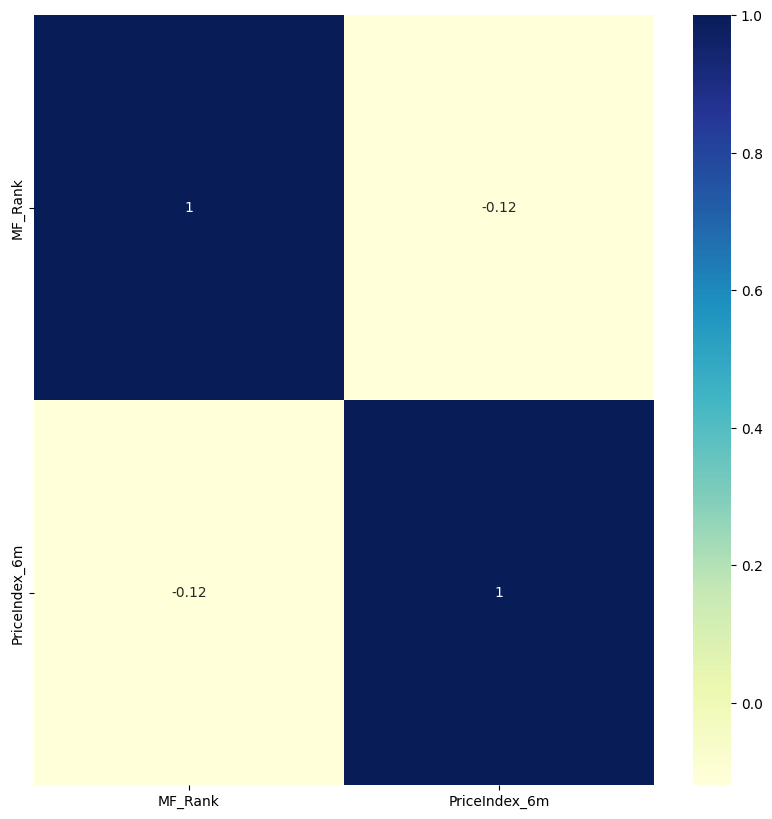

In [147]:
# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(round(scaled_df.corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

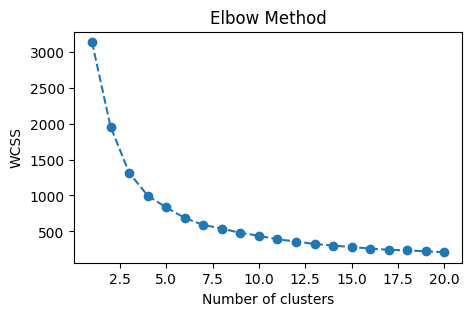

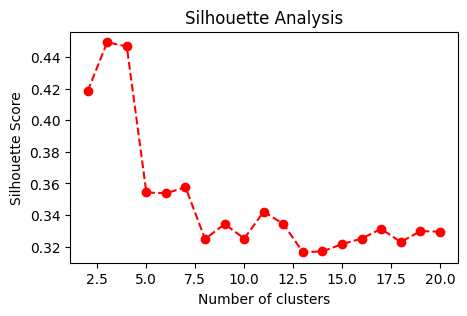

In [148]:
# Generate synthetic data

# Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,random_state= 1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters,random_state=1)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('silhouette_analysis.png')
plt.show()

Index(['market', 'date_pulling', 'industry', 'sector', 'enterpriseValue',
       'totalCashPerShare', 'profitMargins', 'priceToBook', 'debtToEquity',
       'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'beta', 'price_current',
       'price_past', 'MF_EarningYield', 'current_MF_ROC', 'FCF_Yield',
       'PE_offset_Cash', 'PE', 'PriceIndex_6m', 'percenFCFpersharetoprice',
       'MF_Rank_EY', 'MF_Rank_ROC', 'MF_Rank'],
      dtype='object')


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_1681/3895420526.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


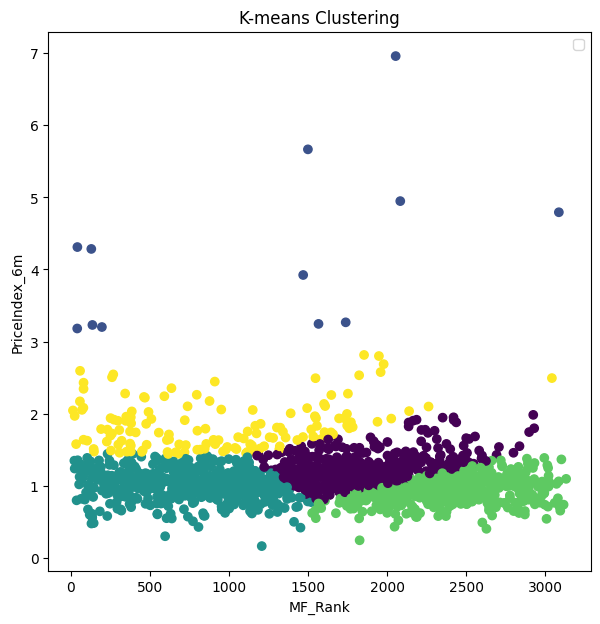

In [149]:
# K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters,random_state = 1)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plotting the clusters
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

print(data.columns)
yax = "PriceIndex_6m"
xax = "MF_Rank"

# K-means plot
ax1.scatter(data[xax], data[yax], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel(xax)
ax1.set_ylabel(yax)
ax1.legend(loc='upper right')


plt.show()

In [150]:
data['clusterno_kmeans'] = kmeans_labels
data.to_csv('clustered_'+filename,index= True)

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_1681/407723027.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata,labels=[i for i in range(n_clusters)])


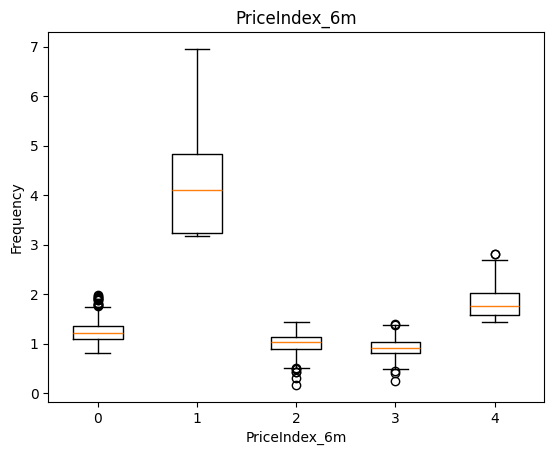

clusterno_kmeans
0    442
1     12
2    510
3    462
4    140
Name: count, dtype: int64


In [151]:
#add three histograms to one plot
bpdata = []
for i in range(0,n_clusters,1):
    bpdata.append(data['PriceIndex_6m'].loc[data['clusterno_kmeans'] == i])
    
plt.boxplot(bpdata,labels=[i for i in range(n_clusters)]) 
#add plot title and axis labels
plt.title('PriceIndex_6m')
plt.xlabel('PriceIndex_6m')
plt.ylabel('Frequency')

#display plot
plt.show()
print(data['clusterno_kmeans'].value_counts().sort_index())

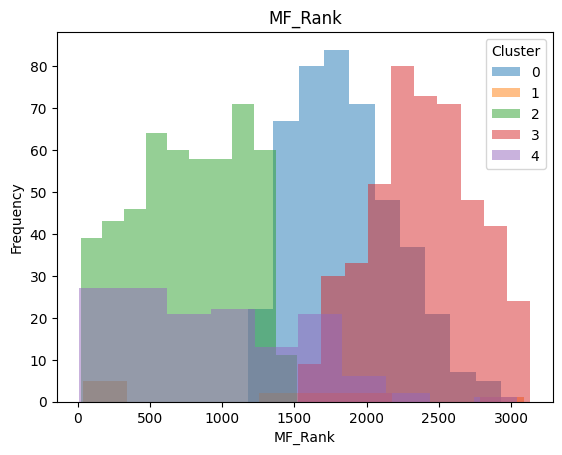

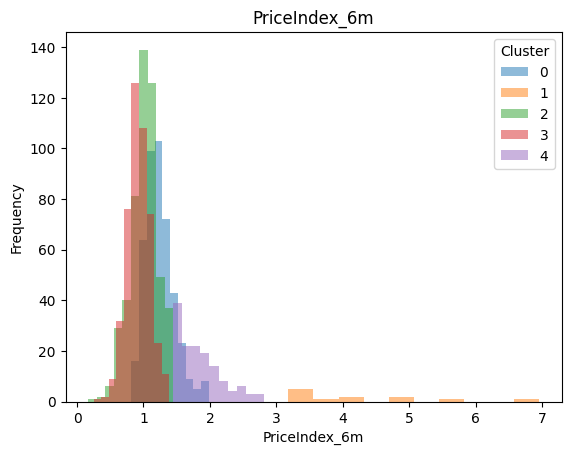

In [152]:
import matplotlib.pyplot as plt

for j in list(data_features.columns) :
    ind = j
    for i in range(0,n_clusters,1):
        #add three histograms to one plot
        plt.hist(data[ind].loc[data['clusterno_kmeans'] == i], alpha=0.5, label=i)


    #add plot title and axis labels
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('Frequency')

    #add legend
    plt.legend(title='Cluster')
    #display plot
    plt.show()

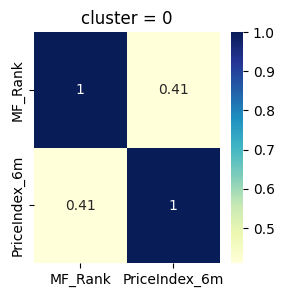

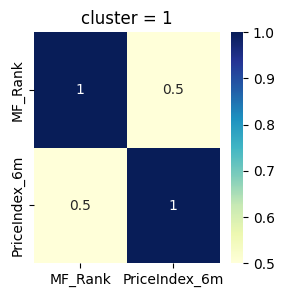

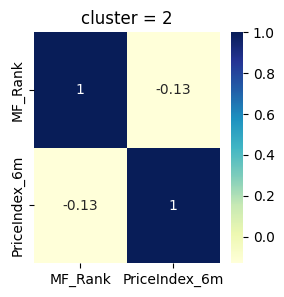

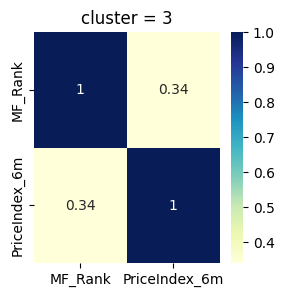

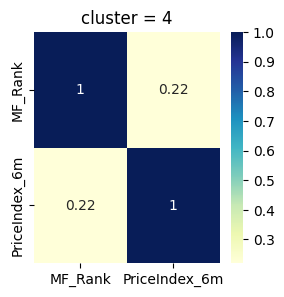

In [153]:
# Plotting correlation heatmap
for i in range(0,n_clusters,1):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title('cluster = ' + str(i))
    dataplot = sns.heatmap(round(data[data_features.columns].loc[data['clusterno_kmeans'] == i].corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

In [154]:
print(data.loc[data['clusterno_kmeans'] == 3])

       market date_pulling                                  industry  \
ticker                                                                 
ABL        US   2025-02-05                          Insurance - Life   
ACHC       US   2025-02-05                   Medical Care Facilities   
ACLS       US   2025-02-05       Semiconductor Equipment & Materials   
AFYA       US   2025-02-05             Education & Training Services   
ALKS       US   2025-02-05  Drug Manufacturers - Specialty & Generic   
...       ...          ...                                       ...   
WTS        US   2025-02-05            Specialty Industrial Machinery   
WU         US   2025-02-05                           Credit Services   
YETI       US   2025-02-05                                   Leisure   
ZIM        US   2025-02-05                           Marine Shipping   
ZTO        US   2025-02-05            Integrated Freight & Logistics   

                    sector  enterpriseValue  totalCashPerShare 